In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

# Monte Carlo algorithm

Functions:
- Polynomial Equations
- Riemann Integral (Rectangle dan Trapezoid)
- Monte-Carlo Method (direct sampling dan throw the dart)

In [4]:
def f(x,soal='a'):
    if soal == 'a':
        y = x**2 
    elif soal =='b':
        y = x**2 + 4*x*np.sin(x)
    else:
        y = (15*x**3 + 21*x**2 + 41*x + 3)**(1/4) * np.exp(-0.5*x)
    return y

def integralrectangle(a,b,dx):
    luas = 0
    while a < b:
        luas += f(a) * dx
        a = a + dx
    return luas

def integraltrapezoid(a,b,dx):
    luas = 0
    while a < b:
        luas += (f(a)+f(a+dx))/2*dx
        a = a + dx
    return luas

def integral(a,b,dx,plot='on',box='rectangle',printhasil=True):
    luas1 = integralrectangle(a,b,dx)
    error1 = abs(luas1 - quad(f,a,b)[0])
    luas2 = integraltrapezoid(a,b,dx)
    error2 = abs(luas2 - quad(f,a,b)[0])
    
    if plot == 'on':
        import matplotlib.patches as patches
        fig = plt.figure(figsize=(6,4))
        ax = fig.add_subplot(111)

        x = np.linspace(a,b,200)
        y = f(x)

        i = a
        while i<b:
            if box == 'rectangle':
                rec = patches.Rectangle((i,0),dx,f(i),
                                        edgecolor='orange',linewidth=2)
                ax.add_patch(rec)
            else:
                sbx = [i,i+dx,i+dx,i]
                sby = [0,0,f(i+dx),f(i)]
                trap = patches.Polygon(list(zip(sbx,sby)),
                                       edgecolor='orange',linewidth=2)
                ax.add_patch(trap)
            i = i+dx

        ax.plot(x,y,color='black')
        plt.title('Riemann Integration ({0}) \n dx = {1}'.format(box,dx))
        plt.xlabel('x',size='10')
        plt.ylabel('y',size='10')
        plt.grid()
        plt.show()
        
    if printhasil == True:
        print('Area under the curve (Rectangle) = ',luas1)
        print('Error Rectangle = ',abs(error1))
        print('Area under the curve (Trapezoid) = ',luas2)
        print('Error Trapezoid = ',abs(error2))  
    
    if box == 'rectangle':
        return luas1,error1
    else:
        return luas2,error2

def directsampling(a,b,n_trials,plot='on',printhasil=True):
    if plot == 'on': plt.figure(figsize=(6,4))
    x = np.linspace(a,b,200)
    n_hits = 0
    for iter in range(n_trials):
        xrand, yrand = random.uniform(a, b), random.uniform(0,max(f(x)))
        if (a<xrand<b) and (yrand<f(xrand)):
            n_hits += 1
            if plot == 'on': plt.scatter(xrand,yrand,color='r')
                
    persentase = (n_hits)/float(n_trials)
    luaskotak = (b-a)*(max(f(x))-0)
    luas = persentase*luaskotak
    error = abs(luas - quad(f,a,b)[0])
    
    if plot == 'on':
        plt.title('Integrasi Monte Carlo: Direct Sampling \n Hit Attempts = {}'.format(n_trials))    
        plt.plot(x,f(x),color='black')
        plt.grid()
        plt.xlabel('x',size='10')
        plt.ylabel('y',size='10')
        plt.show()
    
    if printhasil == True:
        print('Hit Attempts = ',n_trials)
        print('Percentage of area below the curve = {}%'.format(persentase*100))
        print('Area below the curve =',luas)
        print('Error = ',abs(error))
        
    return luas,error
    
def throwthedart(a,b,n,plot='on',printhasil=True):
    x = np.linspace(a,b,n)
    luas = 0
    if plot == 'on' : plt.figure(figsize=(6,4)) 
        
    for i in range(n):
        k = a + (b-a)*random.uniform(0,1)
        y = f(k)
        luas = luas + y
        if plot == 'on': plt.plot([k,k],[0,y],color='r',alpha=0.6)

    luas = (b-a) / (n-1) * luas
    error = abs(luas - quad(f,a,b)[0])

    if plot == 'on':
        plt.grid()
        plt.plot(x,f(x),color='k')
        plt.title('Integrasi Monte Carlo: Throw the Dart \n Hit Attempts = {}'.format(n))
        plt.xlabel('x',size='10')
        plt.ylabel('y',size='10')
        plt.show()
    
    if printhasil == True:
        print('Hit Attempts = ',n)
        print('Area below the curve = ',luas)
        print('Error = ',abs(error))
        
    return luas,error

# Calculation and Visualization

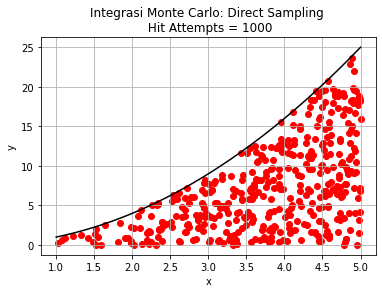

Hit Attempts =  1000
Percentage of area below the curve = 42.3%
Area below the curve = 42.3
Error =  0.9666666666666686


(42.3, 0.9666666666666686)

In [6]:
a,b,hit = 1,5,1000
directsampling(a,b,hit,plot='on')

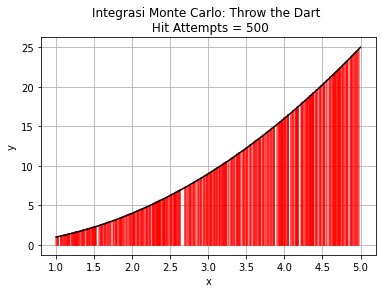

Hit Attempts =  500
Area below the curve =  40.500294603292346
Error =  0.8330387300409825


(40.500294603292346, 0.8330387300409825)

In [7]:
a,b,hit = 1,5,500
throwthedart(a,b,hit,plot='on')

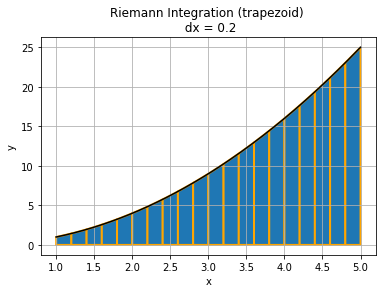

Area under the curve (Rectangle) =  38.96000000000002
Error Rectangle =  2.3733333333333064
Area under the curve (Trapezoid) =  41.360000000000014
Error Trapezoid =  0.026666666666685046


(41.360000000000014, 0.026666666666685046)

In [8]:
# a,b,dx = -1,5,0.4
a,b,dx = 1,5,0.2
integral(a,b,dx,plot='on',box='trapezoid')

# Error Plotting

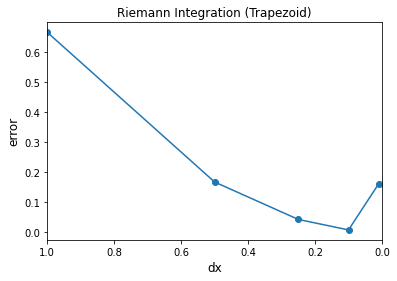

In [11]:
# rieman integration (trapezoid)
dx = [1,0.5,0.25,0.1,0.01]
error = []
for i in dx:
    luas,e = integral(0,4,i,plot='off',box='trapezoid',printhasil=False)
    error.append(e)
plt.figure(figsize=(6,4))
plt.gca().set_xlim(plt.gca().get_xlim()[::-1])
plt.plot(dx,error,'o-')
plt.title('Riemann Integration (Trapezoid)')
plt.xlabel('dx',size='12')
plt.ylabel('error',size='12')
plt.show()

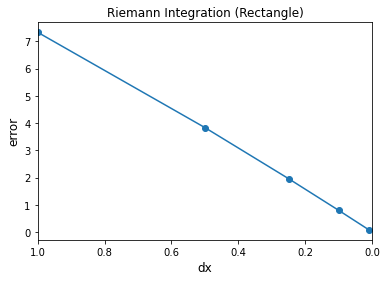

In [12]:
# Riemann Integration (Rectangle)
dx = [1,0.5,0.25,0.1,0.01]
error = []
for i in dx:
    luas,e = integral(0,4,i,plot='off',box='rectangle',printhasil=False)
    error.append(e)
plt.figure(figsize=(6,4))
plt.gca().set_xlim(plt.gca().get_xlim()[::-1])
plt.plot(dx,error,'o-')
plt.title('Riemann Integration (Rectangle)')
plt.xlabel('dx',size='12')
plt.ylabel('error',size='12')
plt.show()

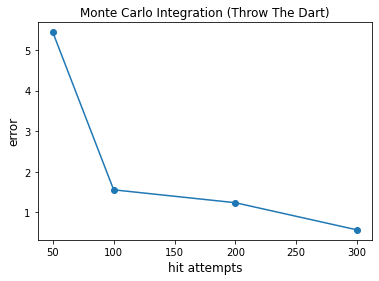

In [15]:
# monte carlo (throw the dart)
hit = [300,200,100,50]
error = []
for i in hit:
    luas,e = throwthedart(0,4,i,plot='off',printhasil=False)
    error.append(e)
plt.figure(figsize=(6,4))
plt.plot(hit,error,'o-')
plt.title('Monte Carlo Integration (Throw The Dart)')
plt.xlabel('hit attempts',size='12')
plt.ylabel('error',size='12')
plt.show()

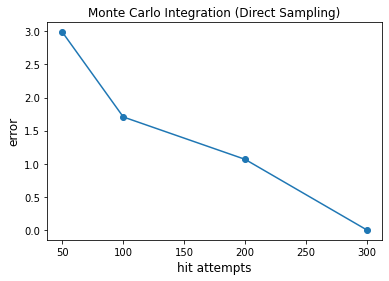

In [17]:
# monte carlo (direct sampling)
hit = [300,200,100,50]
error = []
for i in hit:
    luas,e = directsampling(0,4,i,plot='off',printhasil=False)
    error.append(e)
plt.figure(figsize=(6,4))
plt.plot(hit,error,'o-')
plt.title('Monte Carlo Integration (Direct Sampling)')
plt.xlabel('hit attempts',size='12')
plt.ylabel('error',size='12')
# plt.xlim(750,2000)
plt.show()